In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import average
from numpy import median
import sqlite3

In [3]:
df = pd.read_csv("master.csv")

In [5]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [6]:
for i in df.columns:
    print(i)

country
year
sex
age
suicides_no
population
suicides/100k pop
country-year
HDI for year
 gdp_for_year ($) 
gdp_per_capita ($)
generation


In [7]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [8]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [9]:
df.shape

(27820, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [11]:
df_unique_country = df['country'].unique() # to find total countries in the dataset
df_unique_country

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

# Basic Data Visulization

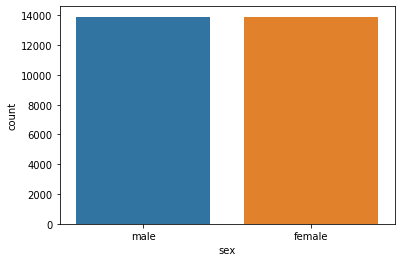

In [12]:
gender = sns.countplot(x="sex", data=df)

###### So, from above plot we can see that the dataset includes equal amount of data for both genders

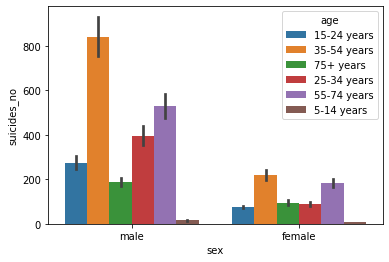

In [13]:
age_plot = sns.barplot(x='sex', y='suicides_no', hue='age', data=df)

In [14]:
df['generation']

0           Generation X
1                 Silent
2           Generation X
3        G.I. Generation
4                Boomers
              ...       
27815       Generation X
27816             Silent
27817       Generation Z
27818       Generation Z
27819            Boomers
Name: generation, Length: 27820, dtype: object

# Ploting through Generation

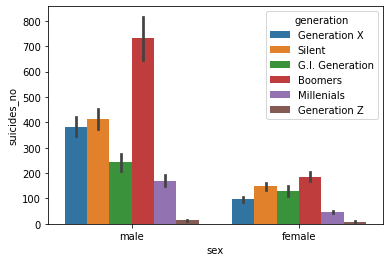

In [15]:
gen = sns.barplot(x='sex', y='suicides_no', hue='generation', data=df)

###### Here, we can see that suicide numbers are higher in the generation of Boomers, whereas it is lowest in Generation Z.

# Plot For Every Year

In [16]:
age_15 = df.loc[df.loc[:, 'age']=='15-24 years',:]
age_35 = df.loc[df.loc[:, 'age']=='35-54 years',:]
age_75 = df.loc[df.loc[:, 'age']=='75+ years',:]
age_25 = df.loc[df.loc[:, 'age']=='25-34 years',:]
age_55 = df.loc[df.loc[:, 'age']=='55-74 years',:]
age_5 = df.loc[df.loc[:, 'age']=='5-14 years',:]

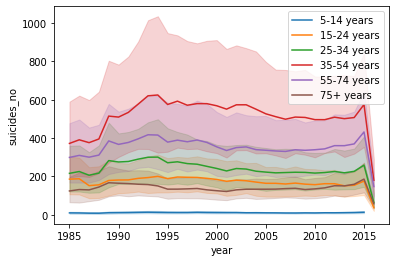

In [19]:
a = sns.lineplot(x='year', y='suicides_no', data=age_5)
b = sns.lineplot(x='year', y='suicides_no', data=age_15)
c = sns.lineplot(x='year', y='suicides_no', data=age_25)
d = sns.lineplot(x='year', y='suicides_no', data=age_35)
e = sns.lineplot(x='year', y='suicides_no', data=age_55)
f = sns.lineplot(x='year', y='suicides_no', data=age_75)

xyz = plt.legend(['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'])

###### plot above shows the change in suicide numbers for people of different age groups for every year

In [20]:
male_population = df.loc[df.loc[:, 'sex']=='male',:]
female_population = df.loc[df.loc[:, 'sex']=='female',:]


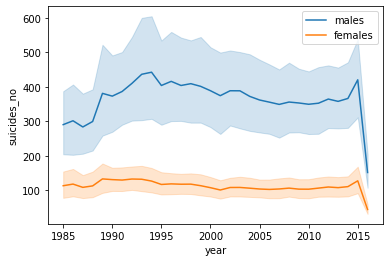

In [21]:
a = sns.lineplot(x='year', y='suicides_no', data=male_population)
b = sns.lineplot(x='year', y='suicides_no', data=female_population)

ma_fe = plt.legend(['males', 'females'])

###### The graph shows the change in suicide numbers for both male and female populations for each year